# Coder Hussam Qassim

# Fetch the Data

In [1]:
'''
Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array with the labels
'''
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
print('mnsit: ', mnist)
x, y = mnist["data"], mnist["target"]
print('The data shape: ', x.shape)
print('The lable shape: ', y.shape)

mnsit:  {'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
The data shape:  (70000, 784)
The lable shape:  (70000,)


# Take a peek at one digit from the dataset

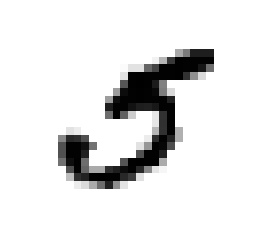

The lable of x[36000]:  5.0


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib
some_digit = x[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
            interpolation="nearest")
plt.axis("off")
plt.show()
# Print the label
print('The lable of x[36000]: ', y[36000])

# Split the data into a training set and a test set

In [3]:
# Create the training and the test sets and lables 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

'''
Shuffling the training set; this will guarantee that all cross-validation folds will be similar (youdon’t 
want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the
training instances, and they perform poorly if they get many similar instances in a row.
'''
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

print('Done..')

Done..


# Training a Binary Classifier

In [4]:
'''
Let’s simplify the problem for now and only try to identify one digit — for example, the number 5. This
“5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes,
5 and not-5. Let’s create the target vectors for this classification task

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

# Using Scikit-Learn’s SGDClassifier class
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

# Detecting images of the number 5
sgd_clf.predict([some_digit])
'''

'\nLet’s simplify the problem for now and only try to identify one digit — for example, the number 5. This\n“5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes,\n5 and not-5. Let’s create the target vectors for this classification task\n\ny_train_5 = (y_train == 5) # True for all 5s, False for all other digits.\ny_test_5 = (y_test == 5)\n\n# Using Scikit-Learn’s SGDClassifier class\nfrom sklearn.linear_model import SGDClassifier\nsgd_clf = SGDClassifier(random_state=42)\nsgd_clf.fit(x_train, y_train_5)\n\n# Detecting images of the number 5\nsgd_clf.predict([some_digit])\n'

# Cross-Validation

In [5]:
'''
Occasionally you will need more control over the cross-validation process than what cross_val_score() and 
similar functions provide. In these cases, you can implement cross-validation yourself; it is actually fairly
straightforward. The following code does roughly the same thing as the preceding cross_val_score() code, 
and prints the same result.
The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of 
each class. At each iteration the code creates a clone of the classifier, trains that clone on the training 
folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs 
the ratio of correct predictions.
'''
'''
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

# Using cross_val_score()function to evaluate the SGDClassifier model using K-fold cross-validation,with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")
'''

'\ny_train_5 = (y_train == 5) # True for all 5s, False for all other digits.\ny_test_5 = (y_test == 5)\n\nfrom sklearn.linear_model import SGDClassifier\nsgd_clf = SGDClassifier(random_state=42)\n\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.base import clone\nskfolds = StratifiedKFold(n_splits=3, random_state=42)\nfor train_index, test_index in skfolds.split(x_train, y_train_5):\n    clone_clf = clone(sgd_clf)\n    x_train_folds = x_train[train_index]\n    y_train_folds = (y_train_5[train_index])\n    x_test_fold = x_train[test_index]\n    y_test_fold = (y_train_5[test_index])\n    \n    clone_clf.fit(x_train_folds, y_train_folds)\n    y_pred = clone_clf.predict(x_test_fold)\n    n_correct = sum(y_pred == y_test_fold)\n    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495\n\n# Using cross_val_score()function to evaluate the SGDClassifier model using K-fold cross-validation,with 3 folds\nfrom sklearn.model_selection import cross_val_score\ncross_

# Confusion Matrix

In [6]:
'''
Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation,
but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means
that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is
made by a model that never saw the data during training).


from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

Using the confusion_matrix() function. Just pass it the target classes ( y_train_5 ) and the predicted 
classes ( y_train_pred )

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
'''

'\nJust like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation,\nbut instead of returning the evaluation scores, it returns the predictions made on each test fold. This means\nthat you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is\nmade by a model that never saw the data during training).\n\n\nfrom sklearn.model_selection import cross_val_predict\ny_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)\n\nUsing the confusion_matrix() function. Just pass it the target classes ( y_train_5 ) and the predicted \nclasses ( y_train_pred )\n\nfrom sklearn.metrics import confusion_matrix\nconfusion_matrix(y_train_5, y_train_pred)\n'

# Precision and Recall

In [7]:
'''
Now your 5-detector does not look as shiny as it did when you looked at its accuracy. When it claims an
image represents a 5, it is correct only 77% of the time. Moreover, it only detects 79% of the 5s.

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_pred) # 0.76871350203503808
recall_score(y_train_5, y_train_pred) # 0.79136690647482011

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular
if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall.
Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are high.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_pred)
'''

'\nNow your 5-detector does not look as shiny as it did when you looked at its accuracy. When it claims an\nimage represents a 5, it is correct only 77% of the time. Moreover, it only detects 79% of the 5s.\n\nfrom sklearn.metrics import precision_score, recall_score\nprecision_score(y_train_5, y_pred) # 0.76871350203503808\nrecall_score(y_train_5, y_train_pred) # 0.79136690647482011\n\nIt is often convenient to combine precision and recall into a single metric called the F1 score, in particular\nif you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall.\nWhereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.\nAs a result, the classifier will only get a high F1 score if both recall and precision are high.\n\nfrom sklearn.metrics import f1_score\nf1_score(y_train_5, y_pred)\n'

# Precision/Recall Tradeoff

In [8]:
'''
Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores
that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its
decision_function() method, which returns a score for each instance, and then make predictions based
on those scores using any threshold you want:
y_scores = sgd_clf.decision_function([some_digit])
y_scores # array([161855.74572176])
threshold = 0
y_some_digit_pred = (y_scores > threshold) # array([True], dtype=bool)
 
How can you decide which threshold to use? For this you will first need to get the scores of all instances in
the training set using the cross_val_predict() function again, but this time specifying that you want it to 
return decision scores instead of predictions

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

Now with these scores you can compute precision and recall for all possible thresholds using the
precision_recall_curve() function

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot precision and recall as functions of the threshold value using Matplotlib
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions,	recalls,	thresholds)
plt.show()
'''

'\nScikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores\nthat it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its\ndecision_function() method, which returns a score for each instance, and then make predictions based\non those scores using any threshold you want:\ny_scores = sgd_clf.decision_function([some_digit])\ny_scores # array([161855.74572176])\nthreshold = 0\ny_some_digit_pred = (y_scores > threshold) # array([True], dtype=bool)\n \nHow can you decide which threshold to use? For this you will first need to get the scores of all instances in\nthe training set using the cross_val_predict() function again, but this time specifying that you want it to \nreturn decision scores instead of predictions\n\ny_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,\n                            method="decision_function")\n\nNow with these scores you can compute precision and recall 

# The ROC Curve

In [9]:
'''
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the
ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true
negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR
is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.
To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the
roc_curve() function

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# Plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the	higher the recall (TPR), the more false positives (FPR) the classifier
produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays
as far away from that line as possible (toward the top-left corner). One way to compare classifiers is to 
measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely
random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one
to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care
more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at 
the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is
mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve 
makes it clear that the classifier has room for improvement (the curve could becloser to the top-right corner)
'''

"\nThe receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.\nIt is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC\ncurve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the\nratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true\nnegative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR\nis also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.\nTo plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the\nroc_curve() function\n\nfrom sklearn.metrics import roc_curve\nfpr, tpr, thresholds = roc_curve(y_train_5, y_scores)\n\n# Plot the FPR against the TPR using Matplotlib\ndef plot_roc_curve(fpr, tpr, label=None):\n    plt.plot(fpr, tpr, linewidth=2, label

# Random Forest Classifier

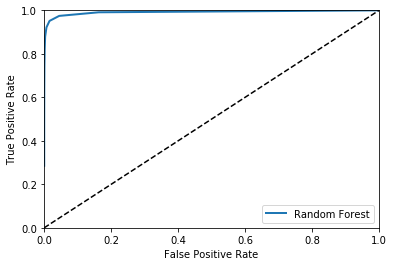

ROC AUC score for the Random Forest Classifier:  0.991607110069


In [10]:
'''
Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the
SGDClassifier. First, you need to get scores for each instance in the training set. But due to the way it works,
the RandomForestClassifier class does not have a decision_function() method. Instead it has a predict_proba()
method. Scikit-Learn classifiers generally have one or the other. The predict_proba() method returns an array
containing a row per instance and a column per class, each containing the probability that the given instance 
belongs to the given class (e.g., 70% chance that the image represents a 5)
'''

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

# Plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
                                    method="predict_proba")

'''
to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positive class’s 
probability as the score
'''
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

# Plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

# ROC AUC score
print('ROC AUC score for the Random Forest Classifier: ', roc_auc_score(y_train_5, y_scores_forest))

# Multiclass Classification

In [11]:
# Using the cross_val_score() function
from sklearn.model_selection import cross_val_score

print('The cross_val_score accuracy without scaling: ', cross_val_score(forest_clf, x_train, y_train, 
                                                                        cv=3, scoring="accuracy")) 

# Scaling the inputs increases the accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

print('The cross_val_score accuracy with scaling: ', cross_val_score(forest_clf, x_train_scaled, 
                                                                     y_train, cv=3, scoring="accuracy"))

The cross_val_score accuracy without scaling:  [ 0.94286143  0.94259713  0.93824074]
The cross_val_score accuracy with scaling:  [ 0.94291142  0.94264713  0.93834075]


# Error Analysis

The confusion matrix: 
 [[5797    1   17   18    8   14   26    5   32    5]
 [   1 6635   26   18   16   13    4    9   12    8]
 [  53   25 5617   50   44   13   41   42   61   12]
 [  23   18  139 5642    6  121   10   57   73   42]
 [  18   21   33    4 5557    8   30   18   25  128]
 [  62   22   25  199   29 4939   57    5   52   31]
 [  46   13   24    7   23   61 5711    0   28    5]
 [  13   36   82   31   59    4    0 5930   19   91]
 [  35   52  107   95   49  106   38   17 5262   90]
 [  32   16   37  102  178   48    7   95   46 5388]]


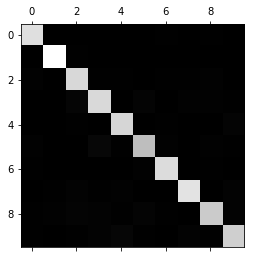

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print('The confusion matrix: \n', conf_mx) 

# It’s more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow()
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

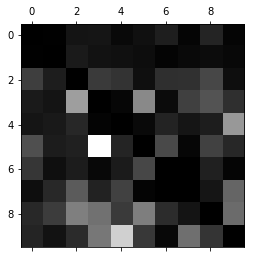

In [13]:
'''
Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the
number of images in the corresponding class, so you can compare error rates instead of absolute numberof 
errors (which would make abundant classes look unfairly bad)
'''
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification

In [14]:
'''
Until now each instance has always been assigned to just one class. In some cases you may want your classifier 
to output multiple classes for each instance. For example, consider a face-recognition classifier: what should 
it do if it recognizes several people on the same picture? Of course it should attach one label per person it 
recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie; then when 
it is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie 
yes”). Such a classification system that outputs multiple binary labels is called a multilabel classification 
system.
'''
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

'''
This code creates a y_multilabel array containing two target labels for each digit image: the first indicates 
whether or not the digit is large (7, 8, or 9) and the second indicates whether or not it is odd. The next 
lines create a KNeighborsClassifier instance (which supports multilabel classification, but not all classifiers 
do) and we train it using the multiple targets array. Now you can make a prediction, and notice that it 
outputs two labels
'''
print('The prediction: ', knn_clf.predict([some_digit])) 

'''
The digit 5 is indeed not large ( False ) and odd ( True ). There are many ways to evaluate a multilabel 
classifier, and selecting the right metric really depends on your project. For example, one approach is to 
measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), 
then simply compute the average score. This code computes the average F1 score across all labels
'''
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_train, cv=3)
print('The F1 score: ', f1_score(y_train, y_train_knn_pred, average="macro"))

'''
This assumes that all labels are equally important, which may not be the case. In particular, if you have
many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s
score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the
number of instances with that target label). To do this, simply set average="weighted" in the preceding code
'''

The prediction:  [[False  True]]


'\nThis assumes that all labels are equally important, which may not be the case. In particular, if you have\nmany more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s\nscore on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the\nnumber of instances with that target label). To do this, simply set average="weighted" in the preceding code\n'

# Multioutput Classification

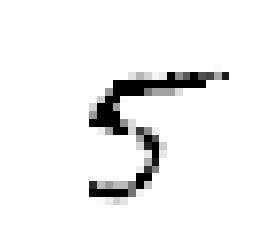

In [21]:
'''
multioutput-multiclass classification (or simply multioutput classification). It is simply a generalization 
of multilabel classification where each label can be multiclass (i.e., it can have more than two possible 
values). To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy 
digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, 
just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each 
label can have multiple values (pixel intensity ranges from 0 to 255).
'''
'''
Let’s start by creating the training and test sets by taking the MNIST images and adding noise to their pixel
intensities using NumPy’s randint() function. The target images will be the original images
'''
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

noise_train = np.random.randint(0, 100, (len(x_train), 784))
noise_test = np.random.randint(0, 100, (len(x_test), 784))
x_train_mod = x_train + noise_train
x_test_mod = x_test + noise_test
y_train_mod = x_train
y_test_mod = x_test

# let’s train the classifier and make it clean this image
some_index = 5500
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)
